<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


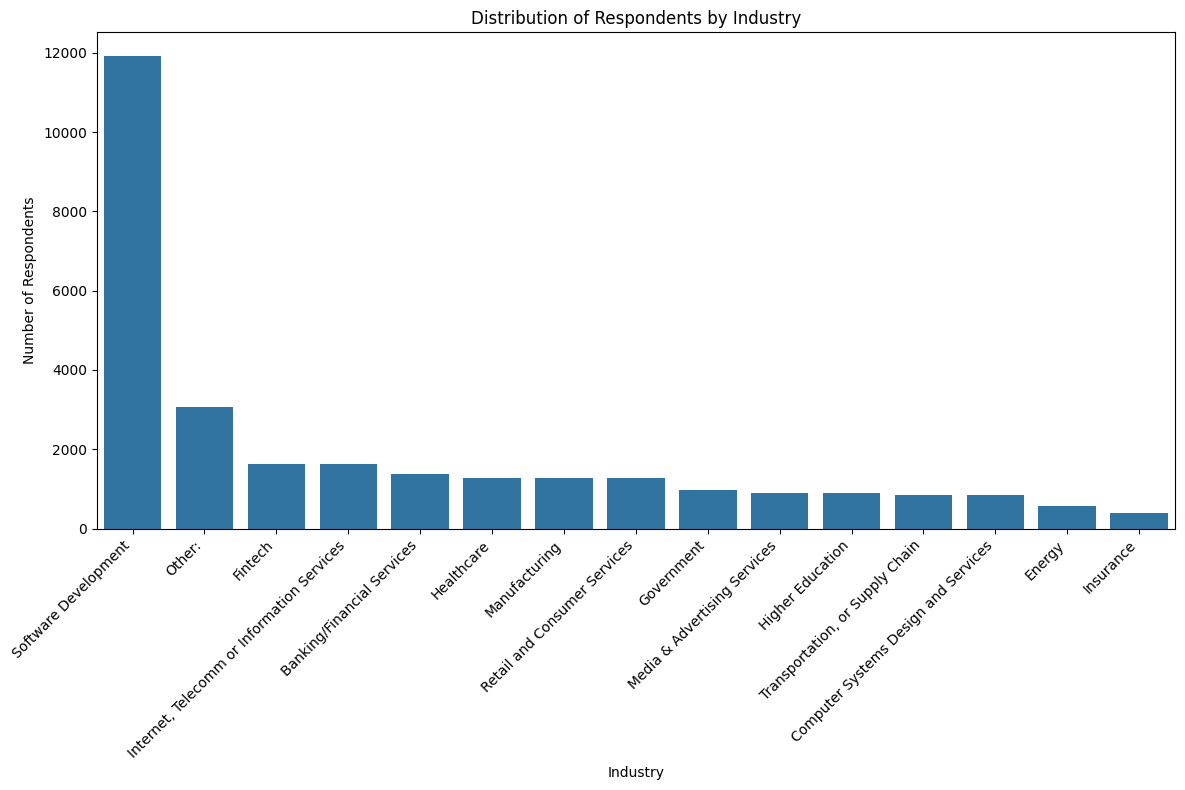


Notable Trends:
The most common industry is: Software Development with 11918 respondents.
The least common industry is: Insurance with 389 respondents.


In [3]:
##Write your code here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and Explore the Dataset
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Step 2: Plot the Distribution of Industry

# Check if 'Industry' column exists
if 'Industry' not in df.columns:
    print("Industry column not found in the dataset.")
else:
    # Count the occurrences of each industry
    industry_counts = df['Industry'].value_counts()

    # Create a bar chart
    plt.figure(figsize=(12, 8))
    sns.barplot(x=industry_counts.index, y=industry_counts.values)

    # Customize the plot
    plt.title('Distribution of Respondents by Industry')
    plt.xlabel('Industry')
    plt.ylabel('Number of Respondents')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Highlight notable trends
    print("\nNotable Trends:")
    print(f"The most common industry is: {industry_counts.index[0]} with {industry_counts.values[0]} respondents.")
    print(f"The least common industry is: {industry_counts.index[-1]} with {industry_counts.values[-1]} respondents.")


<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [4]:
##Write your code here

import pandas as pd

# Step 1: Load and Explore the Dataset
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Step 3: Identify High Compensation Outliers

# Check if 'ConvertedCompYearly' column exists
if 'ConvertedCompYearly' not in df.columns:
    print("ConvertedCompYearly column not found in the dataset.")
else:
    # Calculate basic statistics
    mean_comp = df['ConvertedCompYearly'].mean()
    median_comp = df['ConvertedCompYearly'].median()
    std_comp = df['ConvertedCompYearly'].std()

    print(f"Mean Compensation: {mean_comp:.2f}")
    print(f"Median Compensation: {median_comp:.2f}")
    print(f"Standard Deviation: {std_comp:.2f}")

    # Define the threshold (e.g., 3 standard deviations above the mean)
    threshold = mean_comp + 3 * std_comp

    # Identify outliers
    high_comp_outliers = df[df['ConvertedCompYearly'] > threshold]

    print(f"\nNumber of High Compensation Outliers: {len(high_comp_outliers)}")
    print("\nHigh Compensation Outliers:")

    if 'Respondent' in high_comp_outliers.columns:
        print(high_comp_outliers[['Respondent', 'ConvertedCompYearly']].head())  # Display Respondent ID and Compensation
    elif 'ResponseId' in high_comp_outliers.columns:
        print(high_comp_outliers[['ResponseId', 'ConvertedCompYearly']].head())  # Display ResponseId ID and Compensation
    else:
        print("No Respondent or ResponseId column found, displaying first 5 rows of outlier data")
        print(high_comp_outliers.head())

Mean Compensation: 86155.29
Median Compensation: 65000.00
Standard Deviation: 186756.97

Number of High Compensation Outliers: 89

High Compensation Outliers:
      ResponseId  ConvertedCompYearly
529          530             650000.0
828          829            1000000.0
1932        1933             945000.0
2171        2172             750000.0
2187        2188            2000000.0


In [5]:
import pandas as pd

# Step 1: Load and Explore the Dataset
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Step 3: Identify High Compensation Outliers

# Check if 'ConvertedCompYearly' column exists
if 'ConvertedCompYearly' not in df.columns:
    print("ConvertedCompYearly column not found in the dataset.")
else:
    # Calculate basic statistics
    mean_comp = df['ConvertedCompYearly'].mean()
    median_comp = df['ConvertedCompYearly'].median()
    std_comp = df['ConvertedCompYearly'].std()

    print(f"Mean Compensation: {mean_comp:.2f}")
    print(f"Median Compensation: {median_comp:.2f}")
    print(f"Standard Deviation: {std_comp:.2f}")

    # Define the threshold (e.g., 3 standard deviations above the mean)
    threshold = mean_comp + 3 * std_comp

    # Identify outliers
    high_comp_outliers = df[df['ConvertedCompYearly'] > threshold]

    print(f"\nNumber of High Compensation Outliers: {len(high_comp_outliers)}")
    print("\nHigh Compensation Outliers:")

    if 'Respondent' in high_comp_outliers.columns:
        print(high_comp_outliers[['Respondent', 'ConvertedCompYearly']].head())  # Display Respondent ID and Compensation
    elif 'ResponseId' in high_comp_outliers.columns:
        print(high_comp_outliers[['ResponseId', 'ConvertedCompYearly']].head())  # Display ResponseId ID and Compensation
    else:
        print("No Respondent or ResponseId column found, displaying first 5 rows of outlier data")
        print(high_comp_outliers.head())

Mean Compensation: 86155.29
Median Compensation: 65000.00
Standard Deviation: 186756.97

Number of High Compensation Outliers: 89

High Compensation Outliers:
      ResponseId  ConvertedCompYearly
529          530             650000.0
828          829            1000000.0
1932        1933             945000.0
2171        2172             750000.0
2187        2188            2000000.0


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Number of Outliers in ConvertedCompYearly: 978


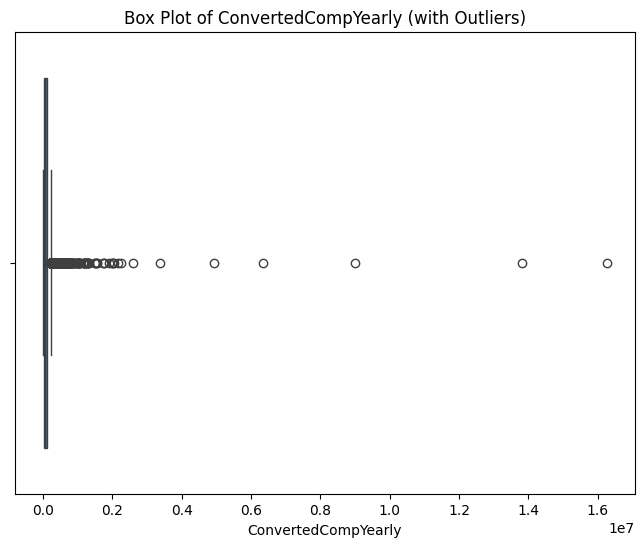

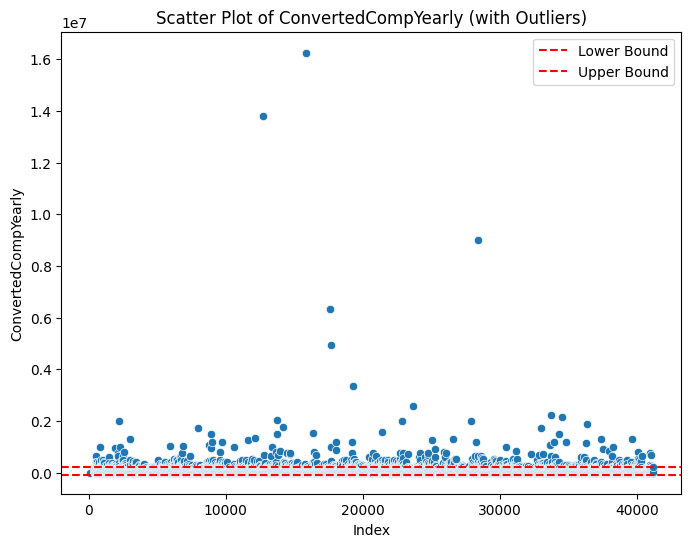

In [6]:
##Write your code here


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and Explore the Dataset
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Step 4: Detect Outliers in Compensation

# Check if 'ConvertedCompYearly' column exists
if 'ConvertedCompYearly' not in df.columns:
    print("ConvertedCompYearly column not found in the dataset.")
else:
    # Calculate Q1, Q3, and IQR
    Q1 = df['ConvertedCompYearly'].quantile(0.25)
    Q3 = df['ConvertedCompYearly'].quantile(0.75)
    IQR = Q3 - Q1

    # Determine upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

    # Count outliers
    num_outliers = len(outliers)
    print(f"Number of Outliers in ConvertedCompYearly: {num_outliers}")

    # Visualize outliers using a box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df['ConvertedCompYearly'])
    plt.title('Box Plot of ConvertedCompYearly (with Outliers)')
    plt.show()

    # Visualize outliers using a scatter plot.
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df.index, y=df['ConvertedCompYearly'])
    plt.axhline(y=lower_bound, color='r', linestyle='--', label='Lower Bound')
    plt.axhline(y=upper_bound, color='r', linestyle='--', label='Upper Bound')
    plt.title('Scatter Plot of ConvertedCompYearly (with Outliers)')
    plt.xlabel('Index')
    plt.ylabel('ConvertedCompYearly')
    plt.legend()
    plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [ ]:
##Write your code here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and Explore the Dataset
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Step 5: Remove Outliers and Create a New DataFrame

# Check if 'ConvertedCompYearly' column exists
if 'ConvertedCompYearly' not in df.columns:
    print("ConvertedCompYearly column not found in the dataset.")
else:
    # Calculate Q1, Q3, and IQR
    Q1 = df['ConvertedCompYearly'].quantile(0.25)
    Q3 = df['ConvertedCompYearly'].quantile(0.75)
    IQR = Q3 - Q1

    # Determine upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

    # Validate the size of the new DataFrame
    print(f"Original DataFrame size: {len(df)}")
    print(f"DataFrame size after removing outliers: {len(df_no_outliers)}")

    #Optional: Visual validation of the new data.
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_no_outliers['ConvertedCompYearly'])
    plt.title('Box Plot of ConvertedCompYearly (Outliers Removed)')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_no_outliers.index, y=df_no_outliers['ConvertedCompYearly'])
    plt.title('Scatter Plot of ConvertedCompYearly (Outliers Removed)')
    plt.show()

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [ ]:
##Write your code here


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and Explore the Dataset
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Step 6: Correlation Analysis

# Map Age to numeric values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 65
}

# Check if 'Age' column exists
if 'Age' not in df.columns:
    print("Age column not found in the dataset.")
else:
    df['Age_Numeric'] = df['Age'].map(age_mapping)

    # Compute correlations
    numeric_cols = df.select_dtypes(include=np.number).columns
    correlation_matrix = df[numeric_cols].corr()

    # Visualize the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

    # Correlation between Age_Numeric and other numerical columns
    age_correlations = correlation_matrix['Age_Numeric'].sort_values(ascending=False)
    print("\nCorrelation with Age_Numeric:")
    print(age_correlations)

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
